In [9]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('final_data.csv')
df.drop(['Unnamed: 0','Ecg','Cholestrol','Oldpeak','Slope','Max Heart Rate'], axis = 1, inplace =True)
df

,Age,Sex,Chest Pain,Rest BP,Fasting Sugar,Exercise Angina,Major Vessels,Defect Type,target
0,52,1,0,125,0,0,2,3,0
1,53,1,0,140,1,1,0,3,0
2,70,1,0,145,0,1,0,3,0
3,61,1,0,148,0,0,1,3,0
4,62,0,0,138,1,0,3,2,0
...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,0,1,0,2,1
1021,60,1,0,125,0,1,1,3,0
1022,47,1,0,110,0,1,1,2,0
1023,50,0,0,110,0,0,0,2,1


In [4]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['target']),df['target'],test_size=0.2,random_state=42)

In [6]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 120)
clf3 = SVC(kernel = 'rbf', gamma = 0.1, C = 1000)

In [7]:
estimators = [('KNN',clf1),('RF',clf2),('SVC',clf3)]

In [10]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [11]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('RF',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=120)),
                             ('SVC', SVC(C=1000, gamma=0.1))])

In [12]:
y_pred = vc.predict(X_test)

In [13]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



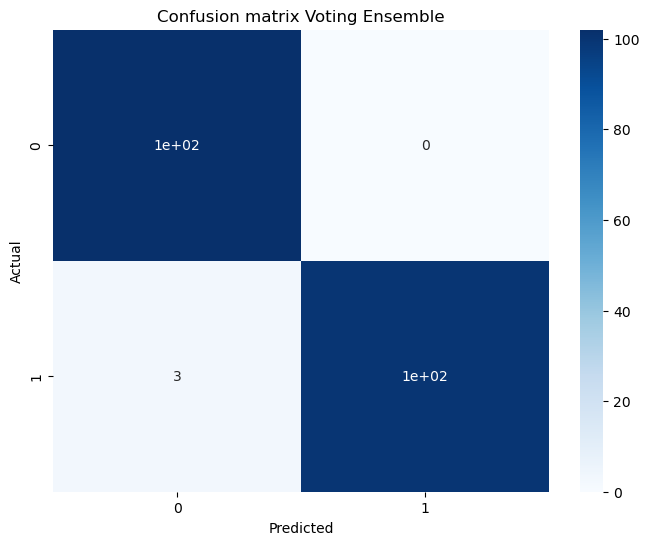

In [16]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix Voting Ensemble')
plt.show()

In [18]:
import pickle
pickle.dump(vc,open('voting.pkl','wb'))